## Analyze A/B Test Results


This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print(f"The number of rows in this df is {df.shape[0]}")

The number of rows in this df is 294478


c. The number of unique users in the dataset.

In [4]:
print(f"There is {df.user_id.nunique()} unique user_id in this df")

There is 290584 unique user_id in this df


d. The proportion of users converted.

In [5]:
print(f"The proportion of users converted is {len(df[df['converted'] == 1]) / len(df)} of 1")

The proportion of users converted is 0.11965919355605512 of 1


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
treatment_no_match = df.query("group == 'treatment' and landing_page != 'new_page'")
print(f"{treatment_no_match.shape[0]} is the number of times a treatment user got the wrong page (old page)")

1965 is the number of times a treatment user got the wrong page (old page)


f. Do any of the rows have missing values?

In [7]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
control_no_match = df.query("group == 'control' and landing_page != 'old_page'")
print(f"{control_no_match.shape[0]} is the number of times a control user got the wrong page (new page)")

1928 is the number of times a control user got the wrong page (new page)


In [9]:
# droping the rows where treatment didn't match new_page
df2 = df.drop(treatment_no_match.index)
print(f"The number of rows after droping the rows where treatment didn't match new_page is: {len(df2)}")

The number of rows after droping the rows where treatment didn't match new_page is: 292513


In [10]:
# droping the rows where control didn't match old_page
df2 = df2.drop(control_no_match.index)
print(f" Now our df2 has {df2.shape[0]} rows\n After droping all the rows where control did't match old_page as well")

 Now our df2 has 290585 rows
 After droping all the rows where control did't match old_page as well


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
print(f"There are {df2.user_id.nunique()} unique user_id in df2")

There are 290584 unique user_id in df2


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
duplicated_user = df2[df2.duplicated(['user_id'], keep=False)]
print(f"The user_id repeated in df2 is {duplicated_user.user_id.values[0]}")

The user_id repeated in df2 is 773192


c. What is the row information for the repeat **user_id**? 

In [14]:
duplicated_user

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop(duplicated_user.index[0], inplace=True)
print(f"After droping one of the repeaed rows our df2 now has {df2.shape[0]} rows")

After droping one of the repeaed rows our df2 now has 290584 rows


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
conv = df2[df2['converted'] == 1]
print(f"There is {len(conv)} individual converting out of {df2.shape[0]}")
p_conv = conv.shape[0] / df2.shape[0]
print(f"So the probability of an individual converting regardless of the page they receive is {p_conv}")

There is 34753 individual converting out of 290584
So the probability of an individual converting regardless of the page they receive is 0.11959708724499628


In [17]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# creating a df for the control group tha I will use in this cell and later.
control_df = df2[df2['group'] == 'control']
control_conv = control_df[control_df['converted'] == 1]
p_control_conv = control_conv.shape[0] / control_df.shape[0]
print(f"The Probability of an individual in contorl group to convert is {p_control_conv} out of 1")

The Probability of an individual in contorl group to convert is 0.1203863045004612 out of 1


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# creating a df for the treatment group tha I will use in this cell and later.
treatment_df = df2[df2['group'] == 'treatment']
treatment_conv = treatment_df[treatment_df['converted'] == 1]
p_treatmen_conv = treatment_conv.shape[0] / treatment_df.shape[0]
print(f"The Probability of an individual in treatment group to convert is {p_treatmen_conv} of 1")

The Probability of an individual in treatment group to convert is 0.11880806551510564 of 1


d. What is the probability that an individual received the new page?

In [20]:
len(df2[df2['landing_page'] == 'new_page']) / len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**answer:**
The Result of the converted rate are almost the same for everyone the overall 
 converted rate is 0.119 and for the control group is 0.12 and the treatment    group is even slightley lower with 0.118 geving that both group had the same number of participation (or close enough) I can say that there is no sufficient evidence that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**answer.**
- H0: P-old >= P-new , the null is: P-old is greater or equal to P-new
- H1: P-new >  P-old , the alternative is P-new is greater than P-old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [21]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
# since there is no diffrence between the converted rate of the new_page and the old_page 
# and since it's equal to the converted rate regardless of the page 
# to get the converted rate for p_new and p_old I will use the whole df to get the converted,
# and that should be the p_new and p_old
p_new = df2[df2['converted'] == 1].shape[0] / df2.shape[0]
print(f"The conversion rate for p_new is {p_new}")

The conversion rate for p_new is 0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = df2[df2['converted'] == 1].shape[0] / df2.shape[0]
print(f"The conversion rate for p_old is {p_old}")

The conversion rate for p_old is 0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
# here I can use the treatmetn df that I created earlier to get the number of individuals in treatemtn group
n_new = treatment_df.shape[0]            
print(f"{n_new}: is the number of individuals in treatement group")

145310: is the number of individuals in treatement group


d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = control_df.shape[0]
print(f"{n_old}: is the number of individuals in control group")

145274: is the number of individuals in control group


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 1, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.0019707254968609894

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
# since getting the p_new and p_old from the same sample will give us the same number as we did before 
# I will just do it once under the name p 
sample_df = df2
p_diffs_list = []
size = len(sample_df)
for _ in range(10000):
    bootsample = sample_df.sample(size, replace=True)
    p = bootsample[bootsample['converted'] == 1].shape[0] / bootsample.shape[0]
    n_new = bootsample[bootsample['group'] == 'treatment'].shape[0]
    n_old = bootsample[bootsample['group'] == 'control'].shape[0]
    new_page_converted = np.random.binomial(1, p, n_new)
    old_page_converted = np.random.binomial(1, p, n_old)
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs_list.append(diff)

In [30]:
p_diffs = np.array(p_diffs_list)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

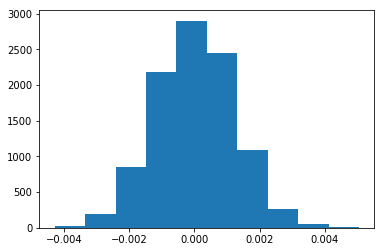

In [31]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
treatment_conv_mean = treatment_df['converted'].mean()
control_conv_mean = control_df['converted'].mean()
actual_diffs = treatment_conv_mean - control_conv_mean
actual_diffs

-0.0015782389853555567

In [33]:
(p_diffs > actual_diffs).mean()

0.90369999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**answer.**
- what I computed in part j is called the p-value in scientific studies and its computed here as the  proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
- The p-value is the probability of getting our statistic or a more extreme value if the null is true.
- if the p-value is larger than our Type 1 Error threshold that we set at 0.05 wich is the case it means that we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null.
- This result shows considring our 0.05 Type 1 Error rate that the old page conversions rate is at least equal or better than the new page conversions rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old = len(df2.query("group == 'control' and converted == 1"))
convert_new = len(df2.query("group == 'treatment' and converted == 1"))
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

In [36]:
# to find out what the z_score means we have to import the below
from scipy.stats import norm
# for a 0.05 type 1 error this will get the critical value of the z_score 
print(norm.ppf(1-(0.05/2)))
# norm.cdf(z_score)

1.95996398454


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
- the z-score of 1.31092 is not larger then the creitical value at 1.959  so we fail to regect the null 
- the p-value here is larger than our threshold 0.05 so we fail to reject the null
- This finding agrees with the finding in parts j. and k. in both cases we have no evidance that the new page conversions rate is better than that of the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?


**Put your answer here.**
- Logistc Regression because we only chicking the possibility of two outcomes (convert or not).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# adding the intercept and creating a dummy var for group column where the treatment is 1 and control is 0
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-10 06:39 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**
- The p-value for ab_page is larger than 0.05 so the coefficient is not significant, it's diffrenet than Part 2 because in Part 2 the p-value was the the probability that the null hypothesis is true, and in this Part the p-value of ab_page tests the null hypothesis that the coefficient is equal to zero. A low p-value smaller than our type 1 error rate of 0.05 indicates that we can reject the null hypothesis which is not the case here because the p-value of ab_page is 0.1899 which means that the coefficient is not significant.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
- considering other things might be a good idea to help us reach a better result.
- the disadvantages in genral is that a combaintion of some factors might lead to a missleading results, testing each factor alone might prove to be working but if the factors are related to one another it might be missleading.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
country_df = pd.read_csv('countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
countries_dummies = pd.get_dummies(country_df['country'])
country_df = country_df.join(countries_dummies)
country_df.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [42]:
df3 = df2.merge(country_df, on='user_id', how='left')
df3 = df3.drop('CA', axis=1)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1


In [43]:
logit_mod2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US']])
results = logit_mod2.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-10 06:39 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

- It doesn't appear that the country had an impact on conversion becasue the p-value for each country is larger than 0.05 so it proved to be of no significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
# adding an interaction between page and each country
df3['us_squared'] = df3['ab_page'] * df3['US']
df3['uk_squared'] = df3['ab_page'] * df3['UK']
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,us_squared,uk_squared
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0


In [45]:
logit_mod3 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'us_squared', 'UK', 'uk_squared']])
results3 = logit_mod3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-10 06:39 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
us_squared     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
uk_squared     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

- The interactions proved to be of no significant on the conversion rate as the p-value for each term is larger than 0.05

### Conclusions:
> Based on the Probability, A/B and Regression tests, there is no evidance that the new page will lead to more traffic, adding the countries to the test didn't change the result, so unless there is more data to be added or more factors to be considered, there is no reason to choose the New Page over the Old Page.

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0